In [30]:
import yfinance as yf
import pandas as pd
import numpy as np

In [31]:
tickers = ["TSLA", "PLTR", "BABA", "NET", "SQ", "DIS"] # yahoo ticker
risk_free_rate = 0.01/365 #BoE risk-free-rate

In [32]:
history = {ticker: yf.Ticker(ticker).history(period="5y") for ticker in tickers}
closes = {ticker: [close for close in history["Close"]] for ticker, history in history.items()}
returns = {ticker: [(closes[i+1]-close)/close for i, close in enumerate(closes[:-1])] for ticker, closes in closes.items()}

In [33]:
expected_returns = [np.mean(returns) for ticker, returns in returns.items()]
cov_matrix = [np.cov(returns) for ticker, returns in returns.items()]

In [34]:
portfolios = np.random.dirichlet(np.ones(len(tickers)), 1000) # dirichlet distribution so portfolio weights sum to 1

In [35]:
port_expected_returns = []
port_standard_deviations = []
port_sharpe_ratios = []
max_sharpe_port = {
    "sharpe_ratio": 0
}

for index, weights in enumerate(portfolios):
    port_expected_return = np.dot(weights, expected_returns)
    port_std = np.std((weights, cov_matrix))
    port_sharpe_ratio = (port_expected_return-risk_free_rate)/port_std

    if port_sharpe_ratio > max_sharpe_port["sharpe_ratio"]:
        max_sharpe_port = {
            "expected_return": port_expected_return,
            "std": port_std,
            "sharpe_ratio": port_sharpe_ratio,
            "weights": {tickers[index]: weight for index, weight in enumerate(weights)}
        }

    port_standard_deviations.append(port_std)
    port_expected_returns.append(port_expected_return)
    port_sharpe_ratios.append(port_sharpe_ratio)

In [36]:
import matplotlib.pyplot as plt

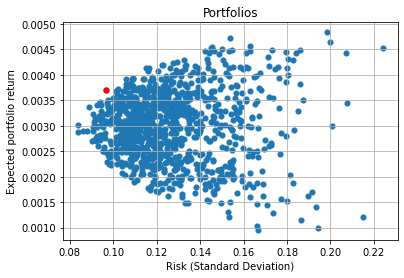

In [37]:
fig, ax = plt.subplots()
ax.scatter(port_standard_deviations,port_expected_returns, linewidths=0.1)
ax.scatter(max_sharpe_port["std"], max_sharpe_port["expected_return"], c="red", linewidths=0.1)

ax.set(xlabel="Risk (Standard Deviation)", ylabel="Expected portfolio return", title="Portfolios")
ax.grid()

fig.savefig("portfolios.png")
plt.show()

In [38]:
print(max_sharpe_port)

{'expected_return': 0.0036927298877228055, 'std': 0.09662073719996597, 'sharpe_ratio': 0.03793525834793696, 'weights': {'TSLA': 0.1797587338622539, 'PLTR': 0.26776502005132735, 'BABA': 0.06477241452815363, 'NET': 0.21808417991437598, 'SQ': 0.18218864951977082, 'DIS': 0.08743100212411829}}


In [39]:
for ticker, weight in max_sharpe_port["weights"].items():
    print(ticker, f"{weight*100} %")

TSLA 17.97587338622539 %
PLTR 26.776502005132734 %
BABA 6.477241452815363 %
NET 21.808417991437597 %
SQ 18.218864951977082 %
DIS 8.743100212411829 %
